```
1  Environment, 环境  
2  Hyper Parameters, 超参数  
3  Training Data, 训练数据  
4  Prepare for Training, 训练准备  
  4.1  mx Graph Input, mxnet图输入  
  4.2  Construct a linear model, 构造线性模型  
  4.3  Mean squared error, 损失函数：均方差  
5  Start training, 开始训练  
6  Regression result, 回归结果  
```

---
# Environment, 环境

In [1]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd
import numpy
import matplotlib.pyplot as plt

mx.random.seed(1)

# Hyper Parameters, 超参数

In [2]:
learning_rate = 0.01
training_epochs = 1000
smoothing_constant = 0.01
display_step = 50
ctx = mx.cpu()

# Training Data, 训练数据

In [3]:
train_X = numpy.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27,3.1])
train_Y = numpy.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

# Prepare for Training, 训练准备

## mx Graph Input, mxnet图输入

In [4]:
# Set model weights，初始化网络模型的权重
W = nd.random_normal(shape=1)
b = nd.random_normal(shape=1)

params = [W, b]
for param in params:
    param.attach_grad()

## Construct a linear model, 构造线性模型

In [5]:
def net(X):
    return X*W + b

## Mean squared error, 损失函数：均方差

In [6]:
# Mean squared error，损失函数：均方差
def square_loss(yhat, y):
    return nd.mean((yhat - y) ** 2)

# Gradient descent， 优化方式：梯度下降
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

# Start training, 开始训练

In [7]:
# Fit training data
data = nd.array(train_X)
label = nd.array(train_Y)
losses = []
moving_loss = 0
niter = 0

for e in range(training_epochs):
    with autograd.record():
        output = net(data)
        loss = square_loss(output, label)
    loss.backward()
    SGD(params, learning_rate)

    ##########################
    #  Keep a moving average of the losses
    ##########################
    niter +=1
    curr_loss = nd.mean(loss).asscalar()
    moving_loss = (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss

    # correct the bias from the moving averages
    est_loss = moving_loss/(1-(1-smoothing_constant)**niter)

    losses.append(est_loss)
    if (e + 1) % display_step == 0:
        print("Epoch:", '%04d' % (e), "cost=", "{:.9f}".format(curr_loss), "W=", W.asnumpy()[0], "b=", b.asnumpy()[0])

Epoch: 0049 cost= 0.184008121 W= 0.321076 b= 0.306496
Epoch: 0099 cost= 0.177502364 W= 0.313129 b= 0.362833
Epoch: 0149 cost= 0.172400355 W= 0.306092 b= 0.412724
Epoch: 0199 cost= 0.168399349 W= 0.29986 b= 0.456905
Epoch: 0249 cost= 0.165261611 W= 0.294342 b= 0.49603
Epoch: 0299 cost= 0.162800938 W= 0.289454 b= 0.530678
Epoch: 0349 cost= 0.160871148 W= 0.285127 b= 0.561361
Epoch: 0399 cost= 0.159357831 W= 0.281294 b= 0.588533
Epoch: 0449 cost= 0.158170953 W= 0.2779 b= 0.612595
Epoch: 0499 cost= 0.157240272 W= 0.274894 b= 0.633904
Epoch: 0549 cost= 0.156510383 W= 0.272232 b= 0.652774
Epoch: 0599 cost= 0.155938014 W= 0.269875 b= 0.669485
Epoch: 0649 cost= 0.155489087 W= 0.267788 b= 0.684284
Epoch: 0699 cost= 0.155137077 W= 0.265939 b= 0.697389
Epoch: 0749 cost= 0.154861033 W= 0.264302 b= 0.708994
Epoch: 0799 cost= 0.154644519 W= 0.262853 b= 0.719271
Epoch: 0849 cost= 0.154474735 W= 0.261569 b= 0.728372
Epoch: 0899 cost= 0.154341608 W= 0.260432 b= 0.736432
Epoch: 0949 cost= 0.154237166 W=

# Regression result, 回归结果

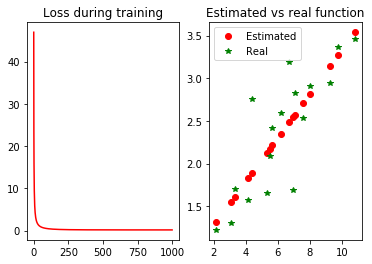

In [8]:
def plot(losses, X, Y, n_samples=10):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X.asnumpy(), net(X).asnumpy(), 'or', label='Estimated')
    fg2.plot(X.asnumpy(), Y.asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()
    
plot(losses, data, label)